<h2 align="center">ML-Driven Bank Churn Prediction: Unlocking Customer Retention Insights, Analyzing Demographic and Financial Factors</h1>
<hr>

### Objective:

* Build a predictive model to classify customers as likely to churn (Exited = 1) or stay (Exited = 0).*
* Identify key factors influencing customer attrition. *
* Provide actionable insights for customer retention strategies. *

**Submission by:-** Latha Reddy Palle

<hr>

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split

#Model Import
from sklearn.linear_model import LogisticRegression

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Loading & reading the data

In [115]:
# Load the dataset and store it in pandas dataframe variable
bankchurn_df = pd.read_csv('Bank_Churn.csv')
bankchurn_df.head() # Displays the top 5 records

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
# shape gives the information about how many rows and how many columns are exist in the dataseta
rows, cols = bankchurn_df.shape
print(f'The dataset is having {rows} rows and {cols} columns')

The dataset is having 10000 rows and 13 columns


In [117]:
# info() gives the information about the column and Null values 
bankchurn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [118]:
# describe - gives the 5 point summary of data of numeric colums
bankchurn_df.describe()
# Looks like data does not have outliers

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Checking For Null Values

In [119]:
# Missing values
bankchurn_df.isnull().sum()
# Looks like no missing values in the data

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Checking for duplicates

In [120]:
# Duplicates
print(f'The data has {bankchurn_df.duplicated().sum()} duplicate records')

The data has 0 duplicate records


#### Categorizing numeric columns and categorical columns

In [121]:
# categorize the features depending on their datatype (int, float, object, bool) and then calculate the number of them. 

# Categorical columns
cat_cols = [col for col in bankchurn_df.columns if bankchurn_df[col].dtype == 'object' or bankchurn_df[col].dtype == 'bool']
print('Categorical columns :',cat_cols)
print()
# Numerical columns
num_cols = [col for col in bankchurn_df.columns if bankchurn_df[col].dtype != 'object']
print('Numerical columns :',num_cols)
print()
print('The data has {0} Categorical columns and {1} Numerical columns'.format(len(cat_cols), len(num_cols)))

Categorical columns : ['Surname', 'Geography', 'Gender']

Numerical columns : ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

The data has 3 Categorical columns and 10 Numerical columns


#### Understanding the numerical data

In [122]:
# Understanding the numerical data

for category in num_cols:
    if bankchurn_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {bankchurn_df[category].nunique()} unique values')
        if bankchurn_df[category].nunique()<10:
            print(set(bankchurn_df[category].tolist()))
    print()

CustomerId has 10000 unique values

CreditScore has 460 unique values

Age has 70 unique values

Tenure has 11 unique values

Balance has 6382 unique values

NumOfProducts has 4 unique values
{1, 2, 3, 4}

HasCrCard has 2 unique values
{0, 1}

IsActiveMember has 2 unique values
{0, 1}

EstimatedSalary has 9999 unique values

Exited has 2 unique values
{0, 1}



#### Understanding the categorical data

In [123]:
# Understanding the categorical data

for category in cat_cols:
    if bankchurn_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {bankchurn_df[category].nunique()} unique values')
        if bankchurn_df[category].nunique()<10:
            print(set(bankchurn_df[category].tolist()))
    print()

Surname has 2932 unique values

Geography has 3 unique values
{'Spain', 'France', 'Germany'}

Gender has 2 unique values
{'Male', 'Female'}



#### Dropping the features which is not useful for the data analysis

In [124]:
# CustomerId is unique id and surname is name.
encoded_df = bankchurn_df.drop(['CustomerId', 'Surname'],axis=1)

# Rename the columns 
encoded_df = encoded_df.rename(columns={"Geography":"Country"})

encoded_df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


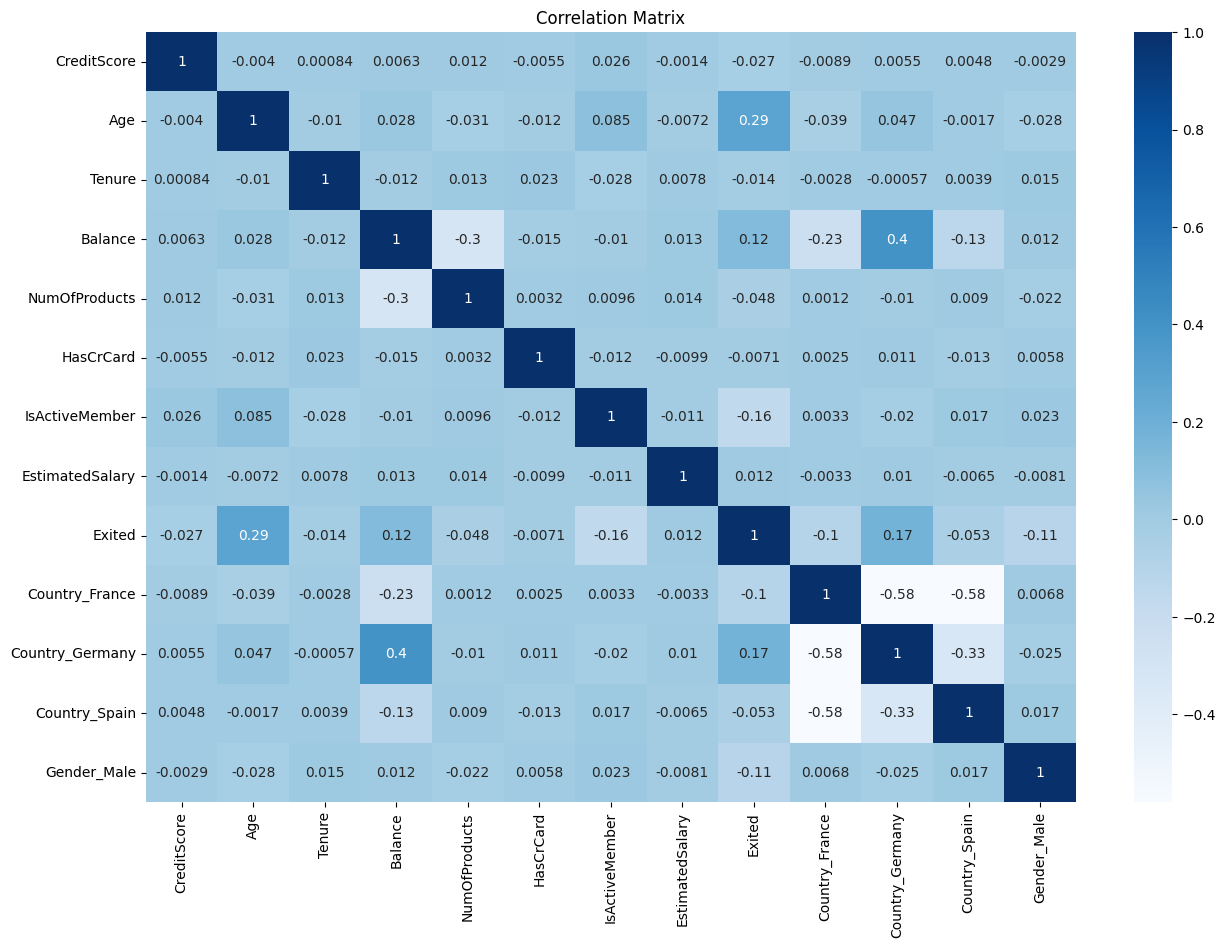

In [234]:
#Correlation heatmap to check relationships between features
plt.figure(figsize=(15,10))
sns.heatmap(encoded_df.corr(numeric_only=True), annot = True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

#### Generating countplot on based on Country

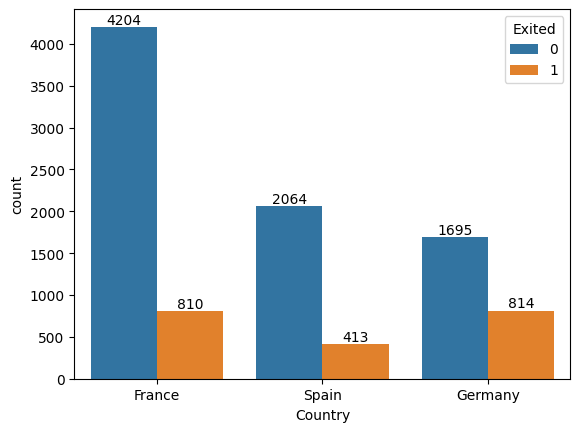

In [127]:
ax = sns.countplot(x='Country', data=encoded_df, hue="Exited", stat='count')
for container in ax.containers:
    ax.bar_label(container)

In [128]:
encoded_df['Country'].value_counts()*100/len(encoded_df)

Country
France     50.14
Germany    25.09
Spain      24.77
Name: count, dtype: float64

#### Encoding the features

In [129]:
# Country column encoding

# One-hot encoding for categorical columns with more than two categories
encoded_df = pd.get_dummies(encoded_df, columns=['Country'], dtype=int)
encoded_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [130]:

# One-hot encoding for categorical columns with more than two categories
encoded_df = pd.get_dummies(encoded_df, columns=['Gender'], drop_first=True, dtype=int)

#### After encoded the data is having 13 features

In [131]:
encoded_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


#### Insights on Target Column.. Checking the balance on the data on the Target (Exited) Column

In [132]:
encoded_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

#### The data is unbalanced

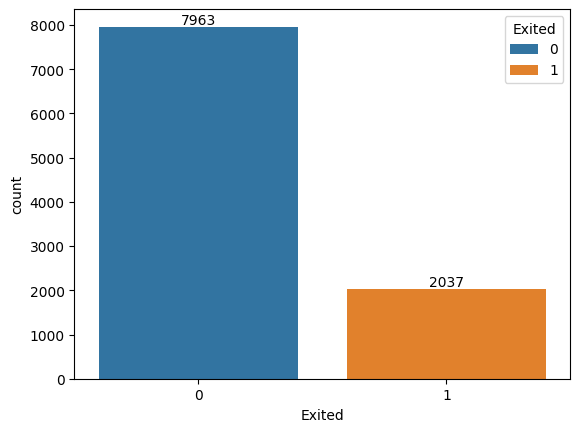

In [133]:
ax = sns.countplot(x='Exited', data=encoded_df, hue='Exited')
for container in ax.containers:
    ax.bar_label(container)

#### Splitting the data to x and y

In [134]:
# All features except target feature
x = encoded_df.drop('Exited', axis=1)

# Target feature
y = encoded_df['Exited']

#### Handling the Imbalanced data with SMOTE

In [135]:
from imblearn.over_sampling import SMOTE

In [136]:
x_balanced, y_balanced = SMOTE().fit_resample(x,y)

In [137]:
x_balanced

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.880000,1,0,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,0,0,1,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1,0,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,1,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,753,48,8,114208.255223,2,1,0,92498.723903,0,1,0,0
15922,704,39,4,124040.072225,1,0,1,51061.650175,0,1,0,0
15923,671,56,0,178148.549989,1,0,0,22047.654144,0,0,0,1
15924,701,42,5,105120.545619,2,1,0,108155.539210,0,0,0,0


In [138]:
y_balanced

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

In [139]:
y_balanced.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

#### Splitting data into train and test

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=12)

In [141]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Male
6403,850,55,0,98710.890000,1,1,1,83617.170000,0,1,0,1
12363,721,33,1,117390.531464,1,0,0,149426.048238,0,0,0,0
936,775,52,8,109922.610000,1,1,1,96823.320000,1,0,0,1
4337,850,38,5,0.000000,2,1,0,16491.640000,1,0,0,1
10736,634,37,3,146444.604018,1,1,1,55288.030707,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7409,807,42,9,105356.090000,2,1,1,130489.370000,0,1,0,0
3325,527,32,7,0.000000,2,1,1,44099.750000,1,0,0,0
9606,524,44,10,118569.030000,2,0,0,82117.200000,1,0,0,1
5787,729,26,4,97268.100000,2,1,0,39356.380000,0,1,0,1


In [142]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Male
8012,747,34,10,0.000000,2,1,1,50759.800000,1,0,0,0
6877,614,37,9,0.000000,2,1,1,62023.100000,0,0,1,0
516,468,56,10,0.000000,3,0,1,62256.870000,1,0,0,0
10208,622,53,8,118133.481640,3,0,0,136399.227454,0,1,0,0
15056,527,47,6,118555.099286,1,0,0,82445.491746,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9283,562,27,3,0.000000,2,1,0,28137.030000,1,0,0,0
10445,594,20,8,83224.611817,1,1,0,143007.852606,0,0,0,0
11906,599,56,2,0.000000,2,0,0,66549.568481,0,0,0,0
4930,627,30,6,112372.960000,1,1,1,118029.090000,0,1,0,1


In [143]:
y_train

6403     1
12363    1
936      1
4337     0
10736    1
        ..
7409     0
3325     0
9606     0
5787     0
14155    1
Name: Exited, Length: 12740, dtype: int64

In [144]:
y_test

8012     0
6877     0
516      1
10208    1
15056    1
        ..
9283     0
10445    1
11906    1
4930     0
14480    1
Name: Exited, Length: 3186, dtype: int64

### Feature Scaling

In [145]:
# Feature Scaling - to scale/normalise the variables into same scale
# we do it after splitting into train and test - to avoid data leakage 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [146]:
x_test_scaled

array([[ 1.07617194, -0.70418991,  1.91893608, ..., -0.57130771,
        -0.46012793, -0.84770423],
       [-0.37169861, -0.40427083,  1.55133044, ..., -0.57130771,
         2.17330864, -0.84770423],
       [-1.96109033,  1.49521667,  1.91893608, ..., -0.57130771,
        -0.46012793, -0.84770423],
       ...,
       [-0.53499228,  1.49521667, -1.02190906, ..., -0.57130771,
        -0.46012793, -0.84770423],
       [-0.23017742, -1.10408202,  0.44851351, ...,  1.7503702 ,
        -0.46012793,  1.17965674],
       [-1.30791565,  0.39551338,  0.08090787, ..., -0.57130771,
        -0.46012793, -0.84770423]])

In [147]:
x_train_scaled

array([[ 2.19745514,  1.39524365, -1.75712035, ...,  1.7503702 ,
        -0.46012793,  1.17965674],
       [ 0.79312958, -0.80416294, -1.3895147 , ..., -0.57130771,
        -0.46012793, -0.84770423],
       [ 1.38098679,  1.09532457,  1.18372479, ..., -0.57130771,
        -0.46012793,  1.17965674],
       ...,
       [-1.35146063,  0.29554036,  1.91893608, ..., -0.57130771,
        -0.46012793,  1.17965674],
       [ 0.88021953, -1.50397412, -0.28669778, ...,  1.7503702 ,
        -0.46012793,  1.17965674],
       [-0.31726738, -0.70418991,  0.08090787, ..., -0.57130771,
        -0.46012793, -0.84770423]])

## Model Selection

In [235]:
def model_evaluation(model,y_test, y_pred, y_pred_proba):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print("<---------------Accuracy Score------------------->")
    print(f"Testing Accuracy:: {accuracy:.2f}")

    print("\n<-------------------Classification Metrix---------------------->")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    print("\n<-------------------Confusion Matrix---------------------->")
    print("\nConfusion Matrix:\n", conf_matrix)

    print("\n<-------------------Classification Report---------------------->")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize confusion matrix
    sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test)")
    plt.show()
    
    # Return metrics as a list
    return [model,accuracy, precision, recall, f1, roc_auc]


#### 1. Logistic Regression

In [148]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=12)

# Train the model
logistic_model.fit(x_train_scaled, y_train)

# Predict on the train set
y_train_logistic_pred = logistic_model.predict(x_train_scaled)

# Predict on the test set
y_test_logistic_pred = logistic_model.predict(x_test_scaled)

# Probabilities for ROC-AUC
y_pred_logistic_proba = logistic_model.predict_proba(x_test_scaled)[:, 1]  

#### Logistic Model Evaluation

In [ ]:
#Training
train_accuracy = accuracy_score(y_train, y_train_logistic_pred)

# Evaluate the model

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_logistic_pred)
precision = precision_score(y_test, y_test_logistic_pred)
recall = recall_score(y_test, y_test_logistic_pred)
f1 = f1_score(y_test, y_test_logistic_pred)
roc_auc = roc_auc_score(y_test, y_pred_logistic_proba)
conf_matrix = confusion_matrix(y_test, y_test_logistic_pred)

# Display results
print("<---------------Accuracy Scores------------------->")
print(f"Training Accuracy:: {train_accuracy:.2f}")
print(f"Testing Accuracy:: {accuracy:.2f}")

print("\n<-------------------Classification Metrix---------------------->")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\n<-------------------Confusion Matrix---------------------->")
print("\nConfusion Matrix:\n", conf_matrix)
print("\n<-------------------Classification Report---------------------->")
print("\nClassification Report:\n", classification_report(y_test, y_test_logistic_pred))

<---------------Accuracy Scores------------------->
Training Accuracy:: 0.82
Testing Accuracy:: 0.82

<-------------------Classification Metrix---------------------->
Precision: 0.85
Recall: 0.78
F1 Score: 0.81
ROC-AUC Score: 0.90

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1349  227]
 [ 362 1248]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1576
           1       0.85      0.78      0.81      1610

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.81      3186
weighted avg       0.82      0.82      0.81      3186



##### Confusion Matrix Heatmap

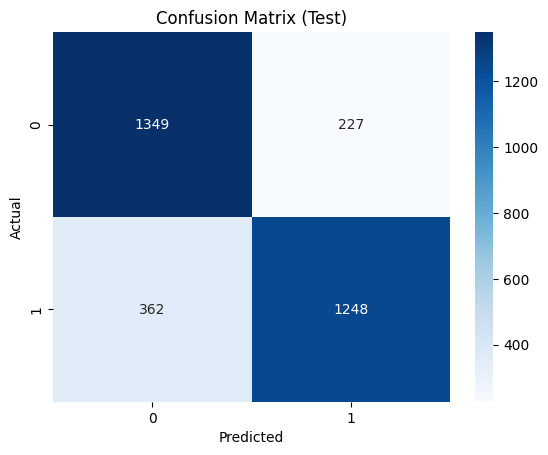

In [150]:
sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

In [151]:
Columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score', 'ROC AUC']
Results = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1, roc_auc]],columns=Columns)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104


#### 2. Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
#DT Intialization
DT_model = DecisionTreeClassifier(random_state=12)
DT_model.fit(x_train_scaled, y_train)

# Model Prediction
y_pred_DT = DT_model.predict(x_test_scaled)

# Probabilities for ROC-AUC
y_pred_DT_proba = DT_model.predict_proba(x_test_scaled)[:, 1]

DT_train_score = DT_model.score(x_train_scaled, y_train)
DT_test_score = DT_model.score(x_test_scaled, y_test)

print('Training Score', DT_train_score)
print('Test Score', DT_test_score)

Training Score 1.0
Test Score 0.8342749529190208


#### Evaluation of the Decision Tree Model

In [154]:
# Evaluate the model

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_DT)
precision = precision_score(y_test, y_pred_DT)
recall = recall_score(y_test, y_pred_DT)
f1 = f1_score(y_test, y_pred_DT)
roc_auc = roc_auc_score(y_test, y_pred_DT_proba)
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Display results
print("<---------------Accuracy Scores------------------->")
print(f"Testing Accuracy:: {accuracy:.2f}")

print("\n<-------------------Classification Metrix---------------------->")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

print("\n<-------------------Confusion Matrix---------------------->")
print("\nConfusion Matrix:\n", conf_matrix)

print("\n<-------------------Classification Report---------------------->")
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))

<---------------Accuracy Scores------------------->
Testing Accuracy:: 0.83

<-------------------Classification Metrix---------------------->
Precision: 0.83
Recall: 0.84
F1 Score: 0.84
ROC-AUC Score: 0.83

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1304  272]
 [ 256 1354]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1576
           1       0.83      0.84      0.84      1610

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



#### Confusion Matrix Heatmap

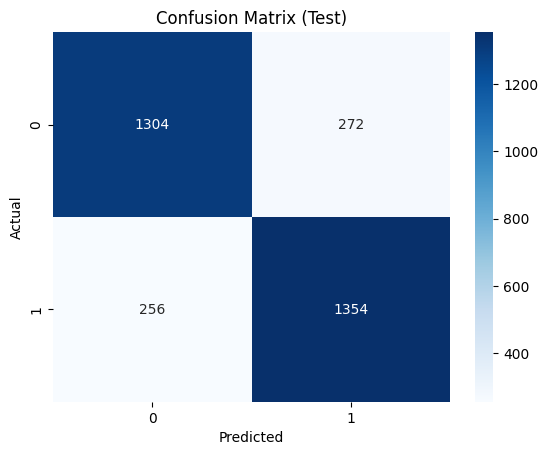

In [155]:
sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

In [156]:
Results = pd.concat([Results, pd.DataFrame([['Decision Tree', accuracy, precision, recall, f1, roc_auc]],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202


#### DT with gridsearchCV (hyperparameter tuning)

In [157]:
# Define the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=12)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Quality of the split measure
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for the best split
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_leaf_nodes': [None, 10, 20]  # Maximum number of leaf nodes
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='f1', cv=5, verbose=1)
grid_search.fit(x_train, y_train)

# Display the best hyperparameters and evaluation results
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_DT_HT = best_model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_DT_HT))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT_HT))


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best F1 Score: 0.841774205119083
Accuracy: 0.8433772755806654

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1576
           1       0.87      0.81      0.84      1610

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [158]:
# Probabilities for ROC-AUC
y_pred_DT_HT_proba = best_model.predict_proba(x_test_scaled)[:, 1]

#### Evaluation of the model: Decision Tree with Hyperparameters 

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.84

<-------------------Classification Metrix---------------------->
Precision: 0.87
Recall: 0.81
F1 Score: 0.84
ROC-AUC Score: 0.72

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1376  200]
 [ 299 1311]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1576
           1       0.87      0.81      0.84      1610

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



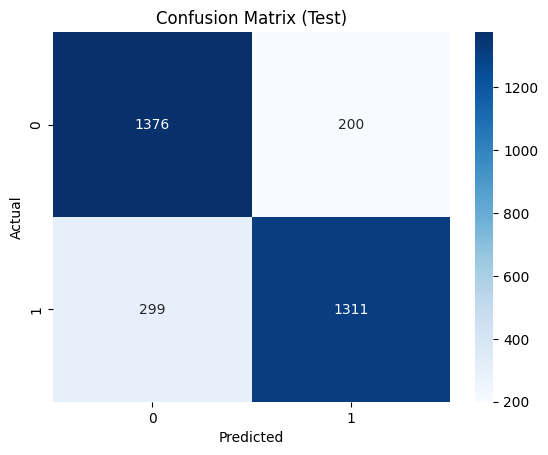

In [159]:
# Evaluate the model

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_DT_HT)
precision = precision_score(y_test, y_pred_DT_HT)
recall = recall_score(y_test, y_pred_DT_HT)
f1 = f1_score(y_test, y_pred_DT_HT)
roc_auc = roc_auc_score(y_test, y_pred_DT_HT_proba)

conf_matrix = confusion_matrix(y_test, y_pred_DT_HT)

# Display results
print("<---------------Accuracy Score------------------->")
print(f"Testing Accuracy:: {accuracy:.2f}")

print("\n<-------------------Classification Metrix---------------------->")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

print("\n<-------------------Confusion Matrix---------------------->")
print("\nConfusion Matrix:\n", conf_matrix)

print("\n<-------------------Classification Report---------------------->")
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT_HT))

sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

In [ ]:
Results = pd.concat([Results, pd.DataFrame([['DT with Hyperparameters', accuracy, precision, recall, f1, roc_auc]],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539


#### 3. Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
# Initialize the model
RF_model = RandomForestClassifier(random_state=12)

# Train the model with training data
RF_model.fit(x_train, y_train)

# Model Prediction
y_pred_RF = RF_model.predict(x_test)

# Probabilities for ROC-AUC
y_pred_RF_proba = RF_model.predict_proba(x_test)[:, 1]

print('Training Accuracy: ',RF_model.score(x_train, y_train))
print('Testing Accuracy', RF_model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuracy 0.8885750156936597


#### Evaluation of Model: Random Forest

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.89

<-------------------Classification Metrix---------------------->
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
ROC-AUC Score: 0.95

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1438  138]
 [ 217 1393]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1576
           1       0.91      0.87      0.89      1610

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



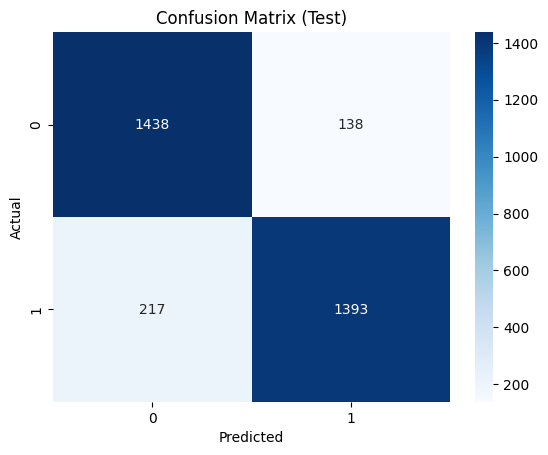

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840


In [ ]:
RF_Results = model_evaluation('Random Forest',y_test, y_pred_RF, y_pred_RF_proba)

Results = pd.concat([Results, pd.DataFrame([RF_Results],columns=Columns)], ignore_index=True)
Results

In [ ]:

# Example usage (ensure you provide y_test, y_pred_RF, and y_pred_RF_proba as arguments to the function):
# metrics = evaluation(y_test, y_pred_RF, y_pred_RF_proba)
# print(metrics)

#### RF with GridSearchCV

In [188]:
# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from the grid search
RF_HT_model = grid_search.best_estimator_

# Predict on the test set
y_pred_RF_HT = RF_HT_model.predict(x_test)

#Predict the proba
y_pred_RF_HT_proba = RF_HT_model.predict_proba(x_test)[:, 1]

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


<---------------Accuracy Score------------------->
Testing Accuracy:: 0.89

<-------------------Classification Metrix---------------------->
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
ROC-AUC Score: 0.95

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1439  137]
 [ 208 1402]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1576
           1       0.91      0.87      0.89      1610

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



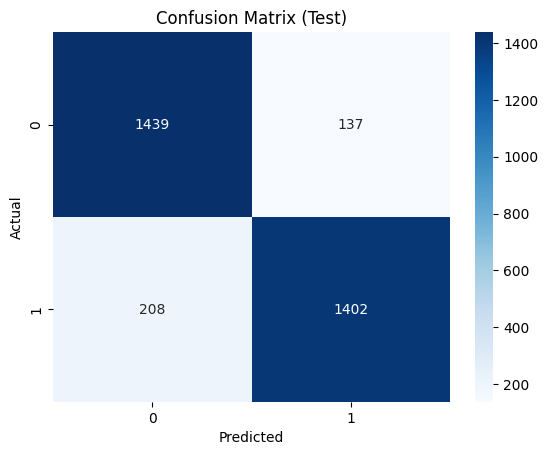

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558


In [190]:
RF_HT_Result = model_evaluation('RF with Hyper Parameters',y_test,y_pred_RF_HT, y_pred_RF_HT_proba)
Results = pd.concat([Results, pd.DataFrame([RF_HT_Result],columns=Columns)], ignore_index=True)
Results

#### 4. Gradient Boosting Classifier

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
# Initialize the Gradient Boosting model
# GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GB_model = GradientBoostingClassifier(random_state=12)

# Train the model
GB_model.fit(x_train, y_train)

# Model Prediction
y_test_GB_pred = GB_model.predict(x_test)

# Probabilities for ROC-AUC
y_pred_GB_proba = GB_model.predict_proba(x_test)[:, 1]

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.87

<-------------------Classification Metrix---------------------->
Precision: 0.90
Recall: 0.83
F1 Score: 0.86
ROC-AUC Score: 0.94

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1423  153]
 [ 270 1340]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1576
           1       0.90      0.83      0.86      1610

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



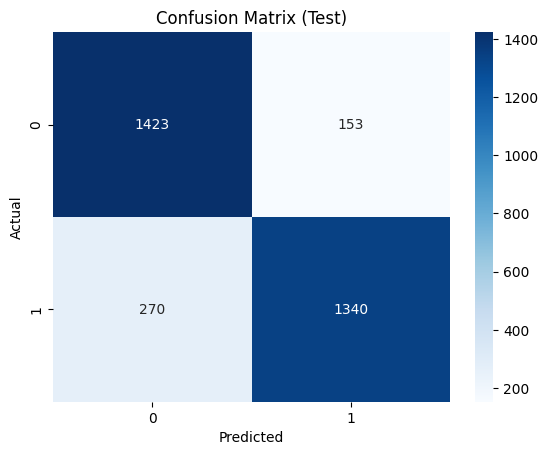

In [191]:
GB_Results = model_evaluation('Gradient Boosting Classifier',y_test, y_test_GB_pred, y_pred_GB_proba)

In [192]:
Results = pd.concat([Results, pd.DataFrame([GB_Results],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558
5,Gradient Boosting Classifier,0.867232,0.897522,0.832298,0.863680,0.940636


### 5.KNN Classifier

In [193]:
# Importing the model
from sklearn.neighbors import KNeighborsClassifier 

# Model Initialization
KNN_Model = KNeighborsClassifier()

# Train the model
KNN_Model.fit(x_train,y_train)

# Model Prediction 
y_pred_KNN = KNN_Model.predict(x_test)

# Probability
y_pred_KNN_proba = KNN_Model.predict_proba(x_test)[:, 1]

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.69

<-------------------Classification Metrix---------------------->
Precision: 0.66
Recall: 0.78
F1 Score: 0.72
ROC-AUC Score: 0.75

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[ 944  632]
 [ 362 1248]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.60      0.66      1576
           1       0.66      0.78      0.72      1610

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



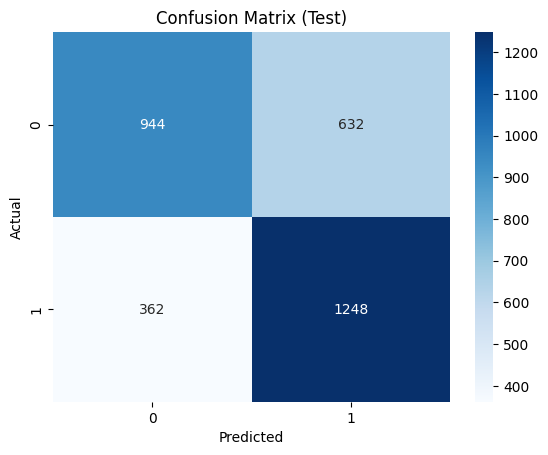

In [194]:
KNN_Results = model_evaluation('KNN Classifier',y_test, y_pred_KNN, y_pred_KNN_proba)

In [195]:
Results = pd.concat([Results, pd.DataFrame([KNN_Results],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558
5,Gradient Boosting Classifier,0.867232,0.897522,0.832298,0.863680,0.940636
6,KNN Classifier,0.688010,0.663830,0.775155,0.715186,0.745925


### 6. XGBoost

In [198]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
XG_model = XGBClassifier(random_state=12, verbosity=0)
# XG_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
XG_model.fit(x_train_scaled, y_train)

# Model Prediction 
y_pred_XGB = XG_model.predict(x_test_scaled)

# Probabilities for ROC-AUC
y_pred_XGB_proba = XG_model.predict_proba(x_test)[:, 1]

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.88

<-------------------Classification Metrix---------------------->
Precision: 0.90
Recall: 0.86
F1 Score: 0.88
ROC-AUC Score: 0.46

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1426  150]
 [ 229 1381]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1576
           1       0.90      0.86      0.88      1610

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



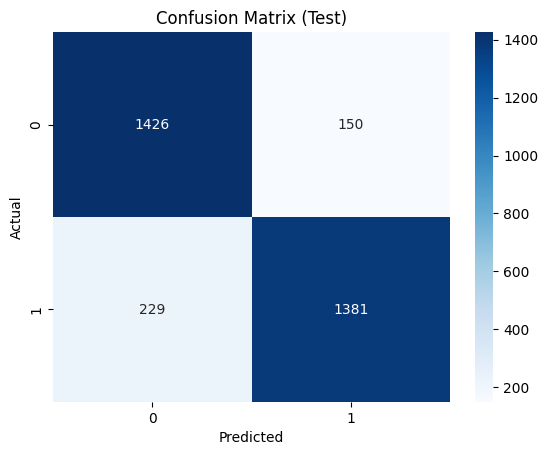

In [199]:
XGB_Results = model_evaluation('XGBoost Classifier',y_test, y_pred_XGB, y_pred_XGB_proba)

In [ ]:
Results = pd.concat([Results, pd.DataFrame([XGB_Results],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558
5,Gradient Boosting Classifier,0.867232,0.897522,0.832298,0.863680,0.940636
6,KNN Classifier,0.688010,0.663830,0.775155,0.715186,0.745925
8,XGBoost Classifier,0.881042,0.902025,0.857764,0.879338,0.456437


#### 7.SVM (Support Vector Machine) 

In [206]:
# Importing the SVM Model
from sklearn.svm import SVC

In [211]:
# Intializing the model
svm_model = SVC(random_state=12, probability=True)

# training the model
svm_model.fit(x_train_scaled, y_train)

# Prediction
# y_train_svm_pred = svm.predict(x_train)
y_pred_SVM = svm_model.predict(x_test_scaled)

# Probabilities for ROC-AUC
y_pred_SVM_proba = svm_model.predict_proba(x_test_scaled)[:, 1]

<---------------Accuracy Score------------------->
Testing Accuracy:: 0.86

<-------------------Classification Metrix---------------------->
Precision: 0.90
Recall: 0.81
F1 Score: 0.86
ROC-AUC Score: 0.94

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1437  139]
 [ 299 1311]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1576
           1       0.90      0.81      0.86      1610

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186



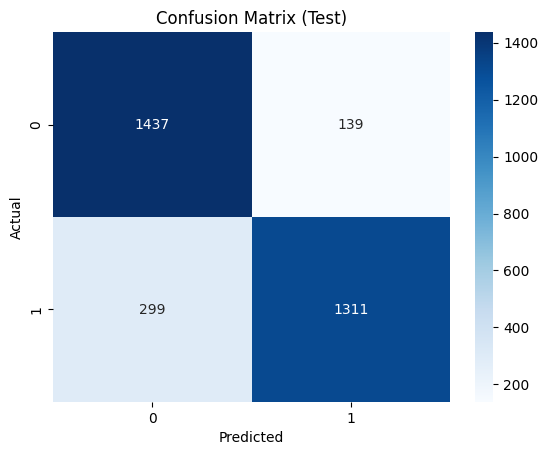

In [212]:
SVM_Results = model_evaluation('SVM Classifier',y_test, y_pred_SVM, y_pred_SVM_proba)

In [213]:
Results = pd.concat([Results, pd.DataFrame([SVM_Results],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558
5,Gradient Boosting Classifier,0.867232,0.897522,0.832298,0.863680,0.940636
6,KNN Classifier,0.688010,0.663830,0.775155,0.715186,0.745925
7,XGBoost Classifier,0.881042,0.902025,0.857764,0.879338,0.456437
8,SVM Classifier,0.862524,0.904138,0.814286,0.856863,0.935977


#### SVM with hyperparameters

In [221]:
# Define a parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf'],  # Type of kernel
    'gamma': [1,0.1,0.01],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function
    'class_weight': ['balanced']  # Handling imbalanced classes
}

In [222]:
# Perform GridSearchCV
SVM_Gs = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
SVM_Gs.fit(x_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {SVM_Gs.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [223]:
# Get the best model from the grid search
best_svm = SVM_Gs.best_estimator_

# Predict on the test set
y_pred_SVM_GS = best_svm.predict(x_test_scaled)

y_pred_SVM_GS_proba = best_svm.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_SVM_GS)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_SVM_GS))

Accuracy: 0.8628374136848713
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1576
           1       0.90      0.82      0.86      1610

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186



<---------------Accuracy Score------------------->
Testing Accuracy:: 0.86

<-------------------Classification Metrix---------------------->
Precision: 0.90
Recall: 0.82
F1 Score: 0.86
ROC-AUC Score: 0.94

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[1428  148]
 [ 289 1321]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1576
           1       0.90      0.82      0.86      1610

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186



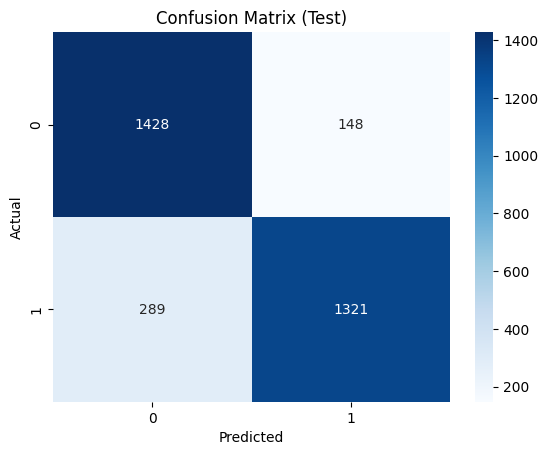

In [225]:
SVM_GS_Results = model_evaluation('SVM with GridSearchCV',y_test, y_pred_SVM_GS, y_pred_SVM_GS_proba)

In [226]:
Results = pd.concat([Results, pd.DataFrame([SVM_GS_Results],columns=Columns)], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815129,0.846102,0.775155,0.809076,0.895104
1,Decision Tree,0.834275,0.832718,0.840994,0.836836,0.834202
2,Decision Tree with Hyperparameters,0.843377,0.867637,0.814286,0.840115,0.723539
3,Random Forest,0.888575,0.909863,0.865217,0.886979,0.949840
4,RF with Hyper Parameters,0.891714,0.910981,0.870807,0.890441,0.951558
5,Gradient Boosting Classifier,0.867232,0.897522,0.832298,0.863680,0.940636
6,KNN Classifier,0.688010,0.663830,0.775155,0.715186,0.745925
7,XGBoost Classifier,0.881042,0.902025,0.857764,0.879338,0.456437
8,SVM Classifier,0.862524,0.904138,0.814286,0.856863,0.935977
9,SVM with GridSearchCV,0.862837,0.899251,0.820497,0.858071,0.936743


## Model Selection & Final Model
<hr />

In the model selection phase, multiple machine learning algorithms were evaluated to determine the most effective model for the given dataset. The selection criteria included accuracy, precision, recall, F1-score, and the model's ability to generalize to unseen data.

Initial models tested included **Logistic Regression, Decision Trees, Gradient Boosting Clasifier, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), XGBoost Classifier, and Random Forest**. Each algorithm was trained, and performance was assessed on Classification Matrix and ensure robust evaluation.

Among the tested models, **Random Forest with Hyper Parameters** consistently outperformed others in terms of accuracy.

To further enhance performance, **hyperparameter tuning** was conducted using Grid Search (or Randomized Search, if applicable). Key hyperparameters optimized included:

- **n_estimators:** Number of trees in the forest

- **max_depth:** Maximum depth of the trees

- **min_samples_split:** Minimum number of samples required to split an internal node

- **min_samples_leaf:** Minimum number of samples required to be at a leaf node

After tuning, the optimized **Random Forest model** achieved **89%** accuracy and **87%** Recall on predicting the Churn customers on the test set.



<h3 align="center">Thank You</h3>